In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import layers

abalone = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", 
                      names=["sex", "length", "diameter", "height", "whole_weight","shucked_weight", "viscera_weight", "shell_weight", "rings"])
abalone['rings'].replace([range(0, 6), range(6, 11), range(11, 16), range(16, 21), range(21, 26), range(26, 31)],[0,1,2, 3, 4, 5], inplace=True)

In [85]:
# apply one-hot encoding to categorical column
onehotencoder = OneHotEncoder()
sex = onehotencoder.fit_transform(abalone.sex.values.reshape(-1,1)).toarray()
sex_enum = ['F', 'I', 'M']
df_onehot_processed = pd.DataFrame(sex, columns = ["sex_"+sex_enum[int(i)] for i in range(sex.shape[1])])
df = pd.concat([abalone, df_onehot_processed], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
 9   sex_F           4177 non-null   float64
 10  sex_I           4177 non-null   float64
 11  sex_M           4177 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 391.7+ KB
None


In [86]:
data = df.drop(['sex', 'rings'], axis=1).values
target = df['rings'].values

In [87]:
# Standard Scale preprocessing
ss = StandardScaler()
ss.fit(data)
data_scaled = ss.transform(data)
print(data_scaled)

[[-0.57455813 -0.43214879 -1.06442415 ... -0.67483383 -0.68801788
   1.31667716]
 [-1.44898585 -1.439929   -1.18397831 ... -0.67483383 -0.68801788
   1.31667716]
 [ 0.05003309  0.12213032 -0.10799087 ...  1.48184628 -0.68801788
  -0.75948762]
 ...
 [ 0.6329849   0.67640943  1.56576738 ... -0.67483383 -0.68801788
   1.31667716]
 [ 0.84118198  0.77718745  0.25067161 ...  1.48184628 -0.68801788
  -0.75948762]
 [ 1.54905203  1.48263359  1.32665906 ... -0.67483383 -0.68801788
   1.31667716]]


In [88]:
# Standard Scaled Model
train_scaled, test_scaled, train_target, test_target = train_test_split(data_scaled, target, test_size=0.2, shuffle=True, random_state=42)
print(train_scaled)

[[ 0.21659075  0.37407537 -0.34709919 ... -0.67483383  1.45345059
  -0.75948762]
 [-0.40800047 -0.53292681 -0.94486999 ... -0.67483383  1.45345059
  -0.75948762]
 [-1.82374058 -1.84304108 -1.66219495 ...  1.48184628 -0.68801788
  -0.75948762]
 ...
 [-0.11652457 -0.12981473 -0.34709919 ... -0.67483383 -0.68801788
   1.31667716]
 [ 0.42478783  0.57563141 -0.46665335 ... -0.67483383 -0.68801788
   1.31667716]
 [ 0.59134549  0.67640943  0.48977993 ...  1.48184628 -0.68801788
  -0.75948762]]


In [96]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(10,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))

sgd = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(test_scaled, test_target)

Epoch 1/5
105/105 [==============================] - 1s 1ms/step - loss: 0.8415 - accuracy: 0.6504
Epoch 2/5
105/105 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.6836
Epoch 3/5
105/105 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.6953
Epoch 4/5
105/105 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.6989
Epoch 5/5
27/27 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.7022


[0.6839585304260254, 0.7021530866622925]

[0.7060760259628296, 0.7051780819892883, 0.7054774165153503, 0.7036815285682678, 0.7084705233573914, 0.7078719139099121, 0.7054774165153503, 0.7063753604888916, 0.7096677422523499, 0.7054774165153503]
[0.6973684430122375, 0.6997607946395874, 0.6997607946395874, 0.7009569406509399, 0.7045454382896423, 0.690191388130188, 0.7057416439056396, 0.7081339955329895, 0.7045454382896423, 0.6866028904914856]


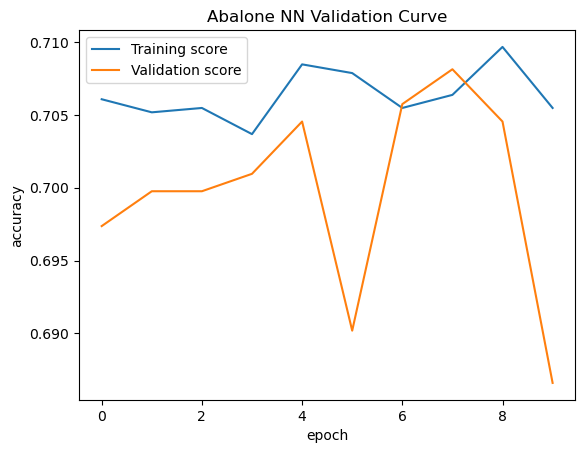

In [92]:
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
										validation_data=(test_scaled, test_target))

plt.title('Abalone NN Validation Curve', loc='center')
plt.plot(history.history['accuracy'])
print(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
print(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training score', 'Validation score'])
plt.savefig('graph\\wine_nn_lc.png', format='png')
plt.show()